# 第6章 k平均法：教師なし学習モデルの基礎

## 6.1 k平均法によるクラスタリングと応用例

**[06KM-01]**

必要なモジュールをインポートします。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint
from PIL import Image

**[06KM-02]**

画像ファイル「photo.jpg」をダウンロードします。

In [2]:
!curl -OL https://github.com/enakai00/colab_mlbook/raw/master/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   139  100   139    0     0   1527      0 --:--:-- --:--:-- --:--:--  1527
100 47187  100 47187    0     0   307k      0 --:--:-- --:--:-- --:--:--  307k


**[06KM-03]**

画像ファイル「photo.jpg」を読み込んで表示します。

白、赤、緑の３色を中心に構成された画像です。

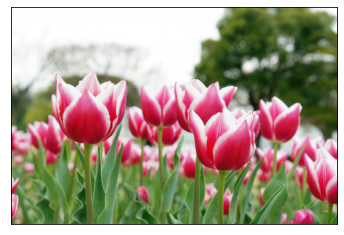

In [3]:
im = Image.open("photo.jpg")

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-04]**

画像データを各ピクセルの (R,G,B) を並べたリストに変換して、確認のためにリストの先頭部分を表示します。

In [4]:
pixels = list(im.convert('RGB').getdata())
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

**[06KM-05]**

k平均法で「代表色」を決定する関数を用意します。

$k$ 個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [5]:
def run_kmeans(pixels, k):
  cls = [0] * len(pixels)

  # 代表色の初期値をランダムに設定
  centers = randint(256, size=(k, 3))
  print('Initial centers:')

  for c in centers:
    print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
  print('\n========================')
  distortion = 0.0

  # 最大50回のIterationを実施
  for iter_num in range(50): 
    centers_new = np.zeros((k, 3))
    num_points = [0] * k
    distortion_new = 0.0

    # E Phase: 各データが属するグループ（代表色）を計算
    for pix, point in enumerate(pixels):
      point = np.array(point)
      dists = [np.dot(d, d) for d in centers - point]
      cls[pix] = np.argmin(dists)
      centers_new[cls[pix]] += point
      num_points[cls[pix]] += 1
      distortion_new += dists[cls[pix]]

    # M Phase: 新しい代表色を計算
    for i in range(k):
      if num_points[i] == 0:
        centers_new[i] = np.array([0, 0, 0])
      else:
        centers_new[i] = centers_new[i] / num_points[i]
    centers = centers_new
    for c in centers:
      print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
    print('\nDistortion: J={:.2f}'.format(distortion_new))

    # Distortion(J)の変化が0.1%未満になったら終了
    if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
        break
    distortion = distortion_new
        
  # 画像データの各ピクセルを代表色で置き換え
  new_pixels = []
  for pix in range(len(pixels)):
    new_pixels.append(tuple(centers[cls[pix]]))

  print("Done.")
  return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

**[06KM-06]**

例として、2つのクラスターに分類します。

In [6]:
result = run_kmeans(pixels, 2)

Initial centers:
(188.00, 166.00, 52.00) (216.00, 44.00, 73.00) 
(159.39, 167.70, 139.61) (164.11, 50.77, 72.28) 
Distortion: J=4071931440.00
(199.74, 195.15, 182.79) (107.59, 76.97, 50.75) 
Distortion: J=2282406691.47
(227.31, 208.89, 211.70) (106.49, 92.94, 57.69) 
Distortion: J=1140841243.42
(232.97, 215.86, 220.24) (110.61, 95.84, 62.03) 
Distortion: J=922800545.03
(234.25, 218.73, 222.96) (112.39, 96.53, 63.64) 
Distortion: J=901537054.11
(234.63, 219.71, 223.84) (113.00, 96.76, 64.19) 
Distortion: J=899011862.08
(234.76, 220.02, 224.12) (113.19, 96.84, 64.37) 
Distortion: J=898730782.57
Done.


**[06KM-07]**

結果を画像として表示します。

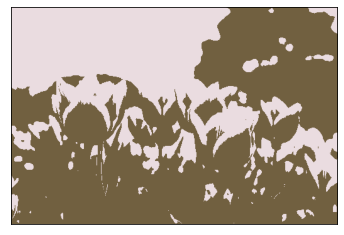

In [7]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-08]**

同様に3つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 3)

Initial centers:
(47.00, 164.00, 207.00) (65.00, 216.00, 162.00) (79.00, 220.00, 224.00) 
(157.30, 40.00, 63.40) (105.94, 117.26, 70.88) (238.20, 226.98, 230.79) 
Distortion: J=5422540286.00
(190.51, 46.15, 77.97) (90.76, 114.27, 62.41) (235.96, 223.10, 226.81) 
Distortion: J=660915780.31
(192.13, 53.06, 83.49) (88.03, 113.17, 60.19) (235.13, 223.97, 226.70) 
Distortion: J=582009991.99
(192.46, 56.42, 85.76) (87.31, 112.75, 59.59) (235.10, 224.70, 227.13) 
Distortion: J=576909987.37
(192.58, 58.17, 86.92) (87.04, 112.54, 59.34) (235.18, 225.11, 227.43) 
Distortion: J=575938686.77
(192.62, 59.10, 87.52) (86.90, 112.42, 59.20) (235.24, 225.32, 227.60) 
Distortion: J=575671879.65
Done.


**[06KM-09]**

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

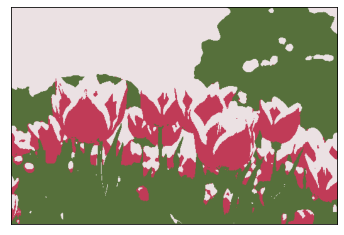

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)